In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [27]:
dataset = pd.read_csv('sales_data_sample.csv',sep=",", encoding='Latin-1')

In [28]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [29]:
dataset.shape

(2823, 25)

In [30]:
dataset.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [31]:
X = dataset.iloc[:, [1, 2]].values
X

array([[ 30.  ,  95.7 ],
       [ 34.  ,  81.35],
       [ 41.  ,  94.74],
       ...,
       [ 43.  , 100.  ],
       [ 34.  ,  62.24],
       [ 47.  ,  65.52]])

In [32]:
from sklearn.cluster import KMeans

`wcss` (within cluster sum of square) : sum of squared distance between each point and centroid in a cluster 
`

We have to find the optimal K value for clustering the data. Now we are using the Elbow method to find the optimal K value.

In [33]:

wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #“init” argument is the method for initializing the centroid.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #nothing but wcss value
    # Inertia measures how well a dataset was clustered by K-Means. 
    # It is calculated by measuring the distance between each data point and its centroid, 
    # squaring this distance, and summing these squares across one cluster.



## WCSS with the K-value, the plot looks like an ELbow.

 ##### WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

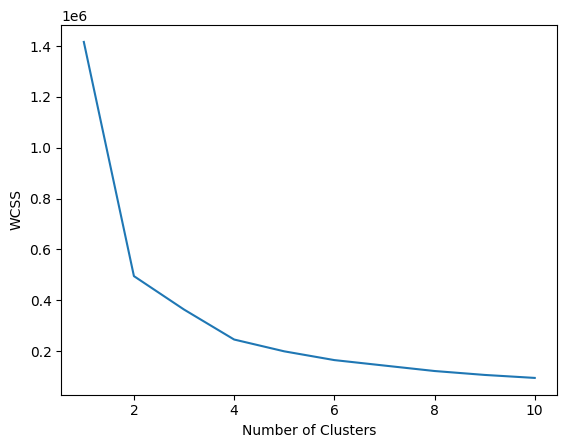

In [34]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

y_kmeans give us different clusters corresponding to X. Now let’s plot all the clusters using matplotlib.

In [36]:
y_kmeans

array([0, 3, 2, ..., 2, 3, 3], dtype=int32)

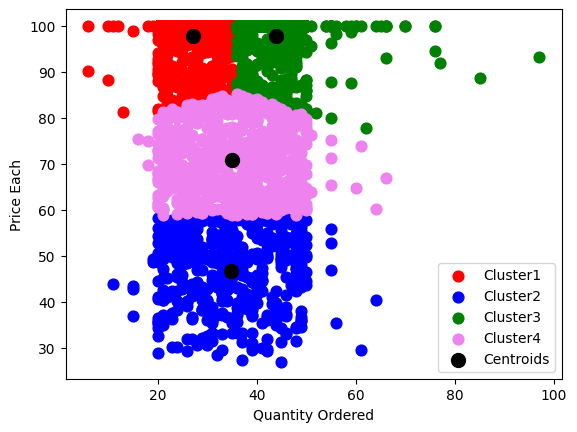

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Quantity Ordered') 
plt.ylabel('Price Each') 
plt.legend() 

if y_kmeans == 0 :
    plt.scatter(X[0],X[1],)

plt.show()